### importing necessary libraries

In [25]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
from keras.applications import vgg16

### import saved model

In [27]:
new_model = keras.models.load_model("saved_model_vgg_final.h5")

### import test image 

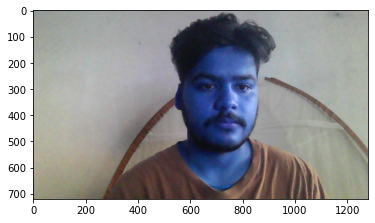

In [28]:
test_image = cv2.imread("Kamal Ghimire.jpg")
from matplotlib import pyplot as plt
plt.imshow(test_image)

### import mtcnn

In [29]:
!pip install mtcnn
from mtcnn import MTCNN 

Defaulting to user installation because normal site-packages is not writeable


### detect face

In [30]:
detector = MTCNN()
result = detector.detect_faces(test_image)
print(result)

1/1 [==============================] - 0s 131ms/step
[{'box': [571, 147, 296, 366], 'confidence': 0.9984128475189209, 'keypoints': {'left_eye': (666, 288), 'right_eye': (810, 287), 'nose': (752, 363), 'mouth_left': (686, 437), 'mouth_right': (803, 438)}}]


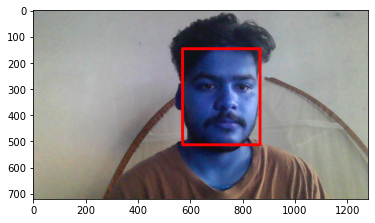

In [31]:
x,y,width,height = result[0]['box']
cv2.rectangle(test_image,pt1=(x,y),pt2=(x+width,y+height),color=(255,0,0),thickness=10)
plt.imshow(test_image)

### crop and resize face

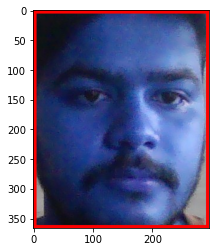

In [32]:
cropped = test_image[y:y+height, x:x+width]
plt.imshow(cropped)

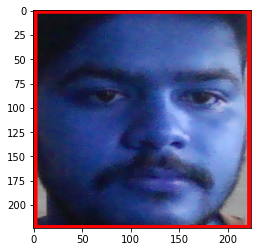

In [33]:
dim = (224,224)
cropped = cv2.resize(cropped,dim)
plt.imshow(cropped)

### preprocess input for model

In [34]:
X = image.img_to_array(cropped)
X = np.expand_dims(X, axis=0)

In [35]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)

### output prediction

1/1 [==============================] - 0s 320ms/step


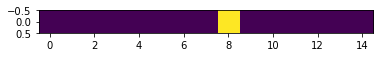

In [36]:
value = new_model.predict(X)
plt.imshow(value)

In [37]:
print(value)

[[7.0230290e-25 1.4011302e-32 1.9693557e-10 0.0000000e+00 6.6743338e-23
  0.0000000e+00 2.7813658e-14 0.0000000e+00 1.0000000e+00 1.5896215e-10
  8.9844005e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.0117429e-36]]


In [38]:
probas = np.array(value)
labels = (probas > 0.5).astype(np.int)
print(labels)

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]


C:\Users\HP\AppData\Local\Temp\ipykernel_2344\438643959.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = (probas > 0.5).astype(np.int)


In [39]:
  if labels[0][0]==1:
    print("Aarati Kumari Yadav")
  elif labels[0][1]==1:
    print("Aasish Khakural")
  elif labels[0][2]==1:
    print("Amit Baral")
  elif labels[0][3]==1:
    print("Asmit Aryal")
  elif labels[0][4]==1:
    print("Asmita Lamichhane")
  elif labels[0][5]==1:
    print("Dikshya Ghimire")
  elif labels[0][6]==1:
    print("Ganesh Baral")
  elif labels[0][7]==1:
    print("Image Acharya")
  elif labels[0][8]==1:
    print("Kamal Ghimire")
  elif labels[0][9]==1:
    print("Rupesh Aryal")
  elif labels[0][10]==1:
    print("Safal Panta")
  elif labels[0][11]==1:
    print("Sagar Panta")
  elif labels[0][12]==1:
    print("Sangam Acharya")
  elif labels[0][13]==1:
    print("Srijana Wagle")
  else:
    print("Sulav Shrestha")

Kamal Ghimire
